In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

datatrain = pd.read_csv('data_input/data_train_preprocessed.csv')
X = datatrain.drop(['flag_kredit_macet'], axis=1)
y = datatrain['flag_kredit_macet']

In [2]:
import warnings; warnings.filterwarnings('ignore') # Just ignore user warnings
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier

In [3]:
# LR = LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=1)
# BNB = BernoulliNB()
# DTC = DecisionTreeClassifier(class_weight='balanced', random_state=1)
# KNN = KNeighborsClassifier(n_neighbors=30, weights='distance', p=1, n_jobs=-1)
# RFC = RandomForestClassifier(class_weight='balanced', n_jobs=-1 ,random_state=1)
# GBC = GradientBoostingClassifier(random_state=1)
# BC = BaggingClassifier(n_jobs=-1, random_state=1)
# ETC = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1, random_state=1)
# XGB = XGBClassifier(n_jobs=-1, random_state=1)
# LGB = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=1)

# LR = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
#                         fit_intercept=True, intercept_scaling=1, max_iter=10,multi_class='warn', n_jobs=-1, penalty='l1', random_state=1,
#                         solver='warn', tol=0.001, verbose=0, warm_start=False)
LR = LogisticRegression(C=100, class_weight='balanced', dual=False,
                        fit_intercept=True, intercept_scaling=1, max_iter=10,
                        multi_class='warn', n_jobs=-1, penalty='l2', random_state=1,
                        solver='warn', tol=0.001, verbose=0, warm_start=False)

# BNB = BernoulliNB(alpha=0.3, binarize=0.0, class_prior=None, fit_prior=True)
BNB = BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

# DTC = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
#                              max_features=None, max_leaf_nodes=None,
#                              min_impurity_decrease=0.0, min_impurity_split=None,
#                              min_samples_leaf=1, min_samples_split=2,
#                              min_weight_fraction_leaf=0.0, presort=False, random_state=1,splitter='best')
DTC = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                             max_depth=5, max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, presort=False, random_state=1,
                             splitter='best')

KNN = KNeighborsClassifier(n_neighbors=30, weights='distance', p=1, n_jobs=-1)

# RFC = RandomForestClassifier(bootstrap=True, class_weight='balanced',
#                              criterion='entropy', max_depth=None, max_features='auto',
#                              max_leaf_nodes=None, min_impurity_decrease=0.0,
#                              min_impurity_split=None, min_samples_leaf=1,
#                              min_samples_split=2, min_weight_fraction_leaf=0.0,
#                              n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
#                              verbose=0, warm_start=False)
RFC = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             criterion='entropy', max_depth=None, max_features='auto',
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, min_samples_leaf=1,
                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                             n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
                             verbose=0, warm_start=False)

# GBC = GradientBoostingClassifier(criterion='friedman_mse', init=None,
#                                  learning_rate=0.1, loss='deviance', max_depth=5,
#                                  max_features=None, max_leaf_nodes=None,
#                                  min_impurity_decrease=0.0, min_impurity_split=None,
#                                  min_samples_leaf=1, min_samples_split=2,
#                                  min_weight_fraction_leaf=0.0, n_estimators=100,
#                                  n_iter_no_change=None, presort='auto', random_state=1,
#                                  subsample=1.0, tol=0.0001, validation_fraction=0.1,
#                                  verbose=0, warm_start=False)
GBC = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                 learning_rate=0.1, loss='deviance', max_depth=10,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 n_iter_no_change=None, presort='auto', random_state=1,
                                 subsample=1.0, tol=0.0001, validation_fraction=0.1,
                                 verbose=0, warm_start=False)

# BC = BaggingClassifier(base_estimator=None, bootstrap=True,
#                        bootstrap_features=False, max_features=1.0, max_samples=1.0,
#                        n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
#                        verbose=0, warm_start=False)
BC = BaggingClassifier(base_estimator=None, bootstrap=True,
                       bootstrap_features=False, max_features=1.0, max_samples=1.0,
                       n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
                       verbose=0, warm_start=False)

# ETC = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
#                            criterion='entropy', max_depth=10, max_features='auto',
#                            max_leaf_nodes=None, min_impurity_decrease=0.0,
#                            min_impurity_split=None, min_samples_leaf=1,
#                            min_samples_split=2, min_weight_fraction_leaf=0.0,
#                            n_estimators=10, n_jobs=-1, oob_score=False, random_state=1,
#                            verbose=0, warm_start=False)
ETC = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
                           criterion='gini', max_depth=25, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=10, n_jobs=-1, oob_score=False, random_state=1,
                           verbose=0, warm_start=False)

# XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#                     colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
#                     max_depth=5, min_child_weight=1, missing=None, n_estimators=100,n_jobs=-1, nthread=None, objective='binary:logistic',
#                     random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#                     seed=None, silent=True, subsample=1)
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                    max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=-1, nthread=None, objective='binary:logistic',
                    random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                    seed=None, silent=True, subsample=1)

# LGB = LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
#                      colsample_bytree=1.0, learning_rate=0.05, max_depth=10,
#                      min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                      n_estimators=50, n_jobs=-1, num_leaves=32, objective=None,random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#                      subsample=1.0, subsample_for_bin=200000, subsample_freq=1)
LGB = LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
                     colsample_bytree=1.0, learning_rate=0.05, max_depth=-1,
                     min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                     n_estimators=100, n_jobs=-1, num_leaves=32, objective=None,
                     random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                     subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

LR_META = LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=1)

In [4]:
VC = VotingClassifier(estimators=[('LR',LR), ('BNB',BNB), ('DTC',DTC), ('KNN',KNN),
                                  ('RFC',RFC), ('GBC',GBC), ('BC',BC), ('ETC',ETC), ('XGB',XGB), ('LGB',LGB)], voting='soft', n_jobs=-1)
SC = StackingClassifier(classifiers=[LR, BNB, DTC, KNN, RFC, GBC, BC, ETC, XGB, LGB], use_probas=True, meta_classifier=LR_META)

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from scipy import interp
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.gridspec as grids
import matplotlib.pyplot as plt
import itertools
import warnings; warnings.filterwarnings('ignore') # Just ignore user warning

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,size=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,size=12)
    # [Negative, Positive], according to confusion m benchmark
    plt.yticks(tick_marks,classes,size=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label',size=14)
    plt.xlabel('Predicted Label',size=14)

def cv_classifier(classifier, X, y, cv=5,
                  print_score=True, plot_rc=True, plot_cm=False):
    SKF = StratifiedKFold(n_splits=cv,shuffle=True,random_state=102)
    ytest = {}; ypred = {};
    Accuracy = []; Recall = []; Precision = []; F_one = []
    fpr = {} # False Positive Rate
    tpr = {} # True Positive Rate
    p = {} # Precision
    r = {} # Recall
    roc_auc = {} # Area Under Curve
    tprs = []; aucs = []; mean_fpr = np.linspace(0,1,100)
    j = int(0)
    print('BUILDING MODEL ======')
    for train_index, test_index in SKF.split(X,y):
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain, ytest[j] = y.iloc[train_index], y.iloc[test_index]
        
        classifier.fit(Xtrain,ytrain)
        
        ypred_train = classifier.predict(Xtrain)
        acc_score_train = metrics.accuracy_score(ytrain,ypred_train) # Accuracy
        rec_score_train = metrics.recall_score(ytrain,ypred_train) # Recall
        prec_score_train = metrics.precision_score(ytrain,ypred_train) # Precision
        f1_value_train = metrics.f1_score(ytrain,ypred_train)
        
        ypred[j] = classifier.predict(Xtest)
        ypred_prob = classifier.predict_proba(Xtest)[:,1]
        # ypred_prob [:,0] => Probability Negative Class
        # ypred_prob [:,1] => Probability Positive Class
        
        # Compute FPR & TPR for ROC Curve
        fpr[j], tpr[j],_ = metrics.roc_curve(ytest[j], ypred_prob)
        # Compute Precision & Recall for Precision-Recall Curve
        p[j], r[j],_ = metrics.precision_recall_curve(ytest[j], ypred_prob)
        tprs.append(interp(mean_fpr, fpr[j], tpr[j]))
        tprs[-1][0] = 0.0
        roc_auc[j] = metrics.auc(fpr[j], tpr[j]) # Compute AUC
        aucs.append(roc_auc[j])
        acc_score = metrics.accuracy_score(ytest[j],ypred[j]) # Accuracy
        Accuracy.append(acc_score);
        rec_score = metrics.recall_score(ytest[j],ypred[j]) # Recall
        Recall.append(rec_score);
        prec_score = metrics.precision_score(ytest[j],ypred[j]) # Precision
        Precision.append(prec_score);
        f1_value = metrics.f1_score(ytest[j],ypred[j])
        F_one.append(f1_value)
        print('Step: %d-%d fold {train/test} (Acc: %0.4f/%0.4f; Rec: %0.4f/%0.4f; Prec: %0.4f/%0.4f; F1: %0.4f/%0.4f)'\
                                              % ((j+1), cv,
                                                 acc_score_train, acc_score,
                                                 rec_score_train, rec_score,
                                                 prec_score_train, prec_score,
                                                 f1_value_train, f1_value))
        j += 1
    print('=====================')
    Accuracy = np.array(Accuracy); Recall = np.array(Recall)
    Precision = np.array(Precision); F_one = np.array(F_one)
    if print_score:
        print('Average Accuracy: %0.5f' % Accuracy.mean())
        print('Average Recall: %0.5f (Hit Rate)' % Recall.mean())
        print('Average Precision: %0.5f (Positive Predictive Value)' % Precision.mean())
        print('Average F1 Score: %0.5f (0:Worst, 1:Best)' % F_one.mean())
    if plot_rc:
        plt.figure(figsize=(25,10))
        gs = grids.GridSpec(1,2)
        ax = plt.subplot(gs[0])
        for i in range(0,cv):
            plt.plot(fpr[i], tpr[i], lw=2,
                     label='ROC fold %d (AUC = %0.3f)' % (i+1,roc_auc[i]),
                     alpha=0.5)
        plt.plot([0, 1], [0, 1], color='navy', lw=2,
                 linestyle='--', label='Luck')
        mean_tpr = np.mean(tprs, axis=0);
        mean_tpr[-1] = 1.0; std_tpr = np.std(tprs, axis=0)
        mean_auc = metrics.auc(mean_fpr, mean_tpr); std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr, color='b',
                 label=r'Mean ROC (AUC = %0.2f $\pm$ %0.3f)' % (mean_auc, std_auc),
                 lw=3, alpha=1)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3,
                         label=r'$\pm$ 1 std. dev.')
        ax.set_title('Receiver Operating Characteristic Curve',size=25)
        ax.set_xlabel('False Positive Rate',size=20)
        ax.set_ylabel('True Positive Rate',size=20)
        plt.xlim(0,1); plt.ylim(0,1)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.legend(loc="lower right",prop = FontProperties(size=15))    
        ax = plt.subplot(gs[1])
        for i in range(0,cv):
            plt.step(r[i], p[i], lw=2,
                     label='PR fold %d' % (i+1),
                     alpha=0.5)
        ax.set_title('Precision-Recall Curve',size=25)
        ax.set_xlabel('Recall (Hit Rate)',size=20)
        ax.set_ylabel('Precision (Positive Predictive Value)',size=20)
        plt.xlim(0,1); plt.ylim(0,1)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.legend(loc="upper right",prop = FontProperties(size=15))
        plt.show()
    if plot_cm:
        index_max = np.where(Accuracy==Accuracy.max())[0][0]
        Ytrue = ytest[index_max]
        Ypred = ypred[index_max]
        cm = metrics.confusion_matrix(Ytrue,Ypred)
        print('Total Data Used : %d' % len(Ytrue))
        plot_confusion_matrix(cm, ['No','Yes'], title='Confusion Matrix',
                              cmap=plt.cm.Blues)

In [6]:
#cv_classifier(VC, X, y, cv=5, plot_cm=True)

In [7]:
#cv_classifier(SC, X, y, cv=5, plot_cm=True)

BUILDING MODEL ======
Step: 1-15 fold {train/test} (Acc: 0.7133/0.7302; Rec: 0.7484/0.7363; Prec: 0.1987/0.2081; F1: 0.3140/0.3245)
Step: 2-15 fold {train/test} (Acc: 0.7130/0.7476; Rec: 0.7500/0.7692; Prec: 0.1988/0.2258; F1: 0.3143/0.3491)
Step: 3-15 fold {train/test} (Acc: 0.7205/0.6750; Rec: 0.7539/0.6923; Prec: 0.2040/0.1698; F1: 0.3211/0.2727)
Step: 4-15 fold {train/test} (Acc: 0.9112/0.9120; Rec: 0.0071/0.0110; Prec: 0.2647/0.5000; F1: 0.0138/0.0215)
Step: 5-15 fold {train/test} (Acc: 0.7174/0.7125; Rec: 0.7476/0.7912; Prec: 0.2011/0.2057; F1: 0.3169/0.3265)
Step: 6-15 fold {train/test} (Acc: 0.7151/0.7106; Rec: 0.7500/0.7363; Prec: 0.2001/0.1959; F1: 0.3159/0.3095)
Step: 7-15 fold {train/test} (Acc: 0.7152/0.7299; Rec: 0.7445/0.8352; Prec: 0.1992/0.2235; F1: 0.3144/0.3527)
Step: 8-15 fold {train/test} (Acc: 0.7164/0.7135; Rec: 0.7547/0.6923; Prec: 0.2016/0.1903; F1: 0.3182/0.2986)
Step: 9-15 fold {train/test} (Acc: 0.7130/0.7415; Rec: 0.7461/0.8132; Prec: 0.1982/0.2284; F1: 0.3

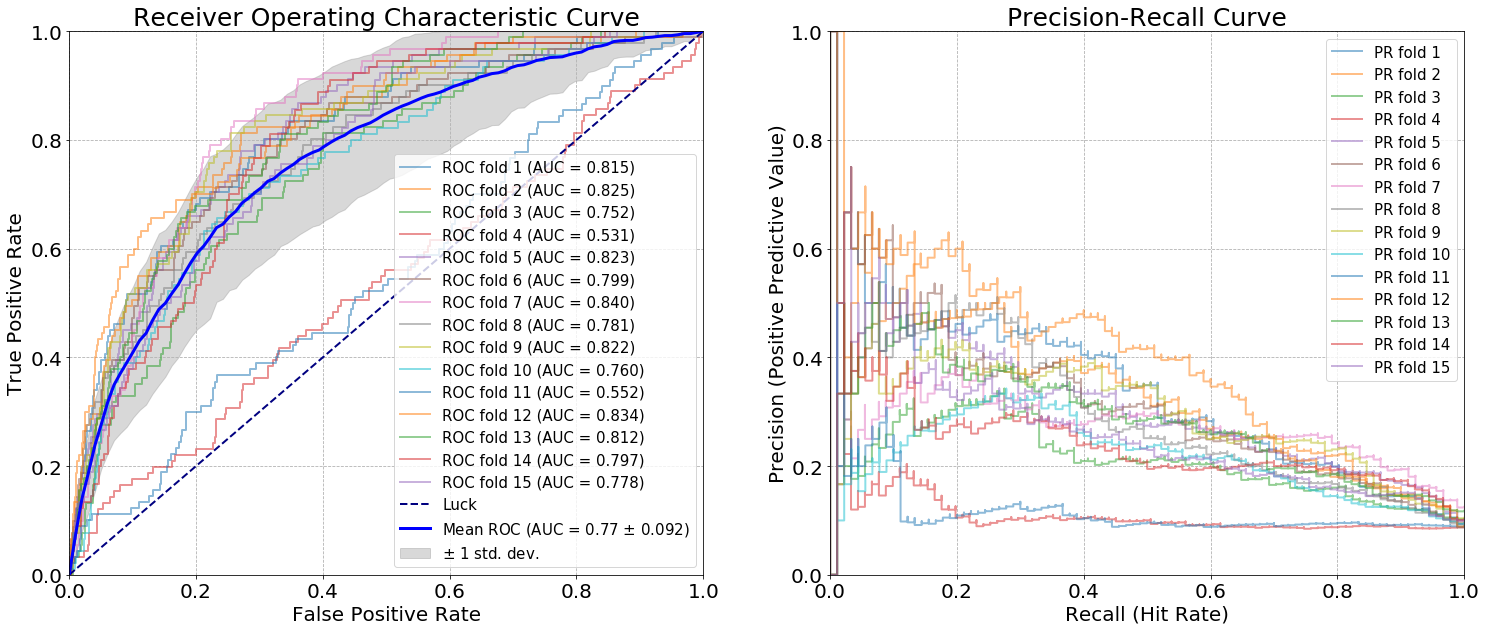

Total Data Used : 1034
Confusion matrix, without normalization


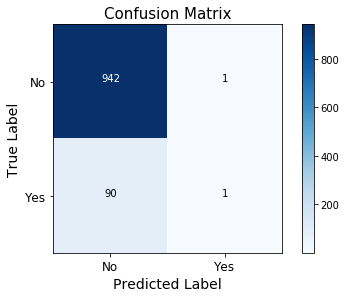

In [18]:
cv_classifier(LR, X, y, cv=15, plot_cm=True)

BUILDING MODEL ======
Step: 1-15 fold {train/test} (Acc: 0.8288/0.8162; Rec: 0.9472/0.7692; Prec: 0.3327/0.2929; F1: 0.4924/0.4242)
Step: 2-15 fold {train/test} (Acc: 0.8331/0.8269; Rec: 0.9448/0.7143; Prec: 0.3383/0.2982; F1: 0.4982/0.4207)
Step: 3-15 fold {train/test} (Acc: 0.8327/0.7805; Rec: 0.9448/0.6154; Prec: 0.3378/0.2258; F1: 0.4976/0.3304)
Step: 4-15 fold {train/test} (Acc: 0.8299/0.8259; Rec: 0.9424/0.7802; Prec: 0.3336/0.3074; F1: 0.4928/0.4410)
Step: 5-15 fold {train/test} (Acc: 0.8330/0.8015; Rec: 0.9456/0.7143; Prec: 0.3382/0.2664; F1: 0.4982/0.3881)
Step: 6-15 fold {train/test} (Acc: 0.8302/0.7822; Rec: 0.9543/0.7143; Prec: 0.3355/0.2462; F1: 0.4964/0.3662)
Step: 7-15 fold {train/test} (Acc: 0.8352/0.8122; Rec: 0.9440/0.7692; Prec: 0.3411/0.2881; F1: 0.5012/0.4192)
Step: 8-15 fold {train/test} (Acc: 0.8286/0.7928; Rec: 0.9456/0.7143; Prec: 0.3323/0.2569; F1: 0.4918/0.3779)
Step: 9-15 fold {train/test} (Acc: 0.8310/0.7977; Rec: 0.9479/0.7473; Prec: 0.3358/0.2677; F1: 0.4

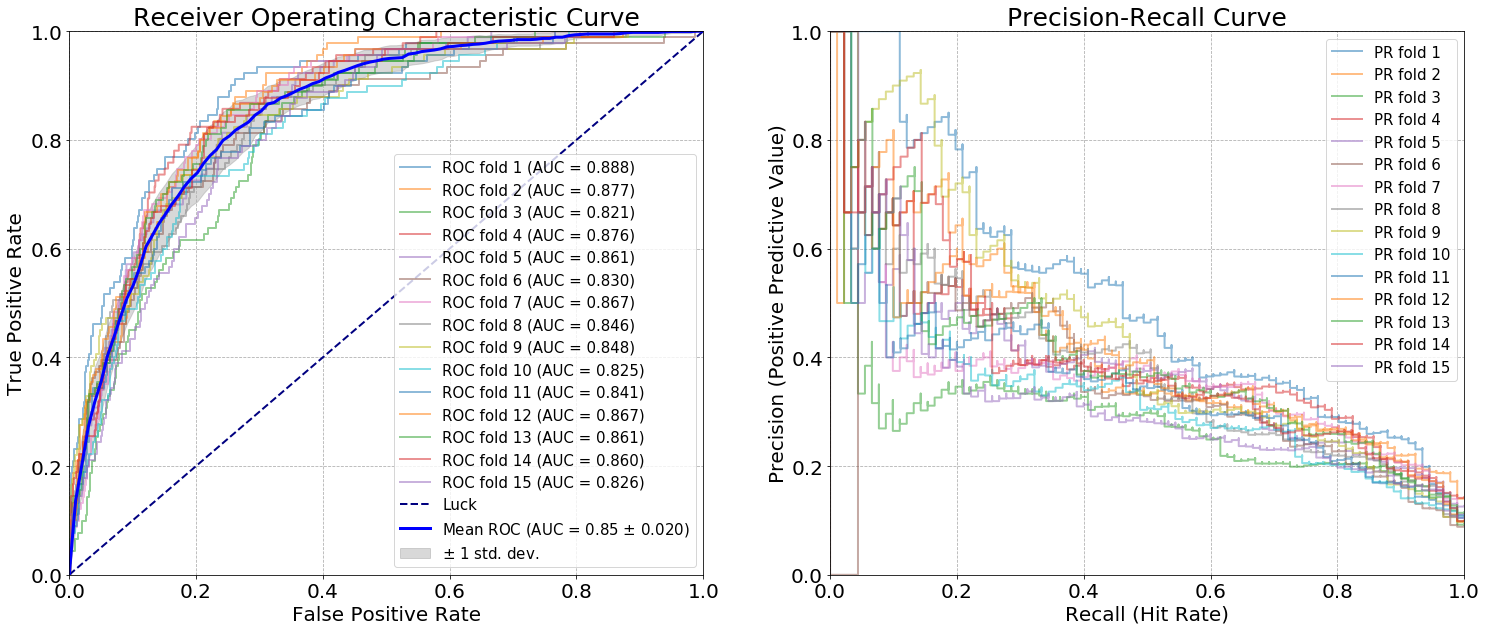

Total Data Used : 1034
Confusion matrix, without normalization


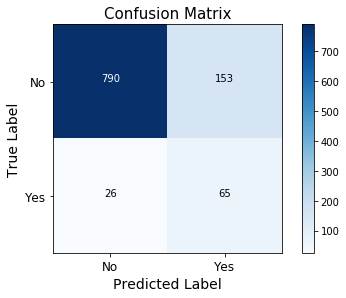

In [15]:
cv_classifier(LGB, X, y, cv=15, plot_cm=True)